# Project 5: Vehicle Detection and Tracking

## Histogram of Oriented Gradients (HOG)

Disable autoscroll in this Jupyter notebook. Borrowed from the following link.
* https://github.com/minrk/ipython_extensions/blob/e8a280f8d0bda1176f70e39cfa2537ee3400446c/extensions/disable_autoscroll.py

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# This section is for playing with the code from the course wares. Please go to the next section for the rubic points.

In [1]:
import os
import time
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = glob.glob('test_images/test*.jpg')
cars = glob.glob('vehicles/**/*.png')
notcars = glob.glob('non-vehicles/**/*.png')
print("Car images: %d" % len(cars))
print("Non car images: %d" % len(notcars))

Car images: 8792
Non car images: 8968


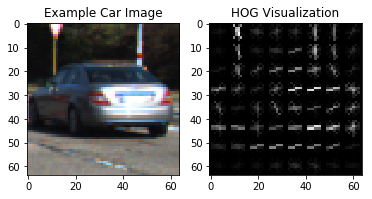

In [2]:
from skimage.feature import hog

pix_per_cell = 8
cell_per_block = 2
orient = 9

img = cars[0]

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

ind = np.random.randint(0, len(cars))
image = mpimg.imread(cars[ind])   
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [3]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=2):
    draw_img = np.copy(img)
    for ((x1, y1), (x2, y2)) in bboxes:
        cv2.rectangle(draw_img, (x1, y1), (x2, y2), color, thick)
    return draw_img

def find_matches(img, template_list):
    bbox_list =[]
    method = cv2.TM_SQDIFF_NORMED
    for template_name in template_list:
        template = mpimg.imread(template_name)
        matched = cv2.matchTemplate(img, template, method=method)
        _, _, min_loc, max_loc = cv2.minMaxLoc(matched)
        h, w = template.shape
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h) 
        bbox_list.append((top_left, bottom_right))
    return bbox_list

def bin_spatial(img, size=(32, 32)):
    features = cv2.resize(img, size).ravel()
    return features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[1]))
    
    return hist_features

def data_look(car_list, notcar_list):
    data_dict = {}
    data_dict["n_cars"] = len(car_list)
    data_dict["n_notcars"] = len(notcar_list)
    
    car_img = mpimg.imread(car_ilst[0])
    data_dict["image_shape"] = car_img.shape
    data_dict["data_type"] = car_img.dtype
    
    return data_dict

/Users/tfukushima/Downloads/.conf.d/.virtualenvs/ml3/lib/python3.5/site-packages/skimage/feature/_hog.py:88: RuntimeWarning: invalid value encountered in sqrt
  image = np.sqrt(image)


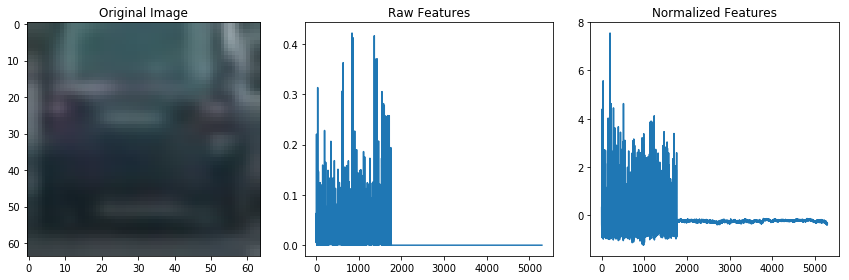

In [4]:
from sklearn.preprocessing import StandardScaler

def extract_color_features(imgs, cspace='RGB', spatial_size=(32, 32),
                    hist_bins=32, hist_range=(0, 256)):
    features = []
    for img in imgs:
        image = mpimg.imread(img)
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else:
            feature_image = np.copy(image)
        color_features = bin_spatial(feature_image).ravel()
        color_histogram_features = color_hist(feature_image).ravel()
        features.append(np.concatenate((color_features, color_histogram_features)))
    return features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def extract_hog_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # print(feature_image)
        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_feature = get_hog_features(feature_image[:,:,channel], 
                                               orient, pix_per_cell, cell_per_block, 
                                               vis=False, feature_vec=True)
                hog_features.append(hog_feature)
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # print(hog_features)
        # Append the new feature vector to the features list
        features.append(np.nan_to_num(hog_features))
    # Return list of feature vectors
    return features

# car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
#                         hist_bins=32, hist_range=(0, 256))
# notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
#                         hist_bins=32, hist_range=(0, 256))

sample_size = 100
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

colorspace = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

# t=time.time()
car_features = extract_hog_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_hog_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.predict(X_test[:100])

array([ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.])

### Criteria: Explain how (and identify where in your code) you extracted HOG features from the training images. Explain how you settled on your final choice of HOG parameters.

I ended up with having the LUV color space and the all HOG channel as the extracted features. It takes some time to extract features based on them but it gave the solid data. The extracting the features dominates the creating the classifier and it takes more time than training the SVC but once it is trained, it gives the fast predictions with the relatively high accuracy.

In [6]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9, 
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        if type(file) is str:
            image = mpimg.imread(file)
            if file.endswith("png"):
                image = (image * 255).astype(np.uint8)
        else:
            image = file
        image = cv2.resize(image, (64,64))
        # image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

### Criteria: Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I used the following parameters:

```
color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
spatial_size = (32, 32)  # Spatial binning dimensions
hist_bins = 32  # Number of histogram bins
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()
```

Basically I used all of the features including spatial features, histogram features and hog features.

In [7]:
# Read in cars and notcars
cars = glob.glob('vehicles/*/*.png')
notcars = glob.glob('non-vehicles/*/*.png')
      
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
# sample_size = 500
# cars = cars[0:sample_size]
# notcars = notcars[0:sample_size]

color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 32 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()

color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
spatial_size = (32, 32)  # Spatial binning dimensions
hist_bins = 32  # Number of histogram bins
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()


def train_classifier(cars, notcars, color_space=color_space, orient=orient, 
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                     hog_channel=hog_channel, spatial_size=spatial_size,
                     hist_bins=hist_bins,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    t = time.time()
    car_features = extract_features(cars, color_space=color_space, spatial_size=spatial_size,
                                    hist_bins=hist_bins, orient=orient, 
                                    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                    hog_channel=hog_channel,
                                    spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=color_space, spatial_size=spatial_size,
                                       hist_bins=hist_bins, orient=orient, 
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                       hog_channel=hog_channel,
                                       spatial_feat=spatial_feat,hist_feat=hist_feat, hog_feat=hog_feat)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract HOG features...')

    # Create an array stack of feature vectors
    X = np.vstack((np.asarray(car_features), np.asarray(notcar_features))).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    
    # Create a label vectors
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    
    # Split data into the training and test data
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)
    
    # Train the linear SVC 
    print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t = time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    
    return svc, X_scaler


# This section is for playing with the code from the course wares. Please go to the next section for the rubic points.

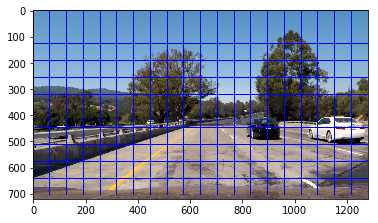

In [10]:
# slide_window

In [12]:
# search_window

In [8]:
orient = 9
pix_per_cell = 8
cell_per_block = 2
spatial_size = (32, 32)
hist_bins = 32

svc, X_scaler = train_classifier(cars, notcars, color_space=color_space, orient=orient, 
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                     hog_channel=hog_channel, spatial_size=spatial_size,
                     hist_bins=hist_bins,
                     spatial_feat=True, hist_feat=True, hog_feat=True)

175.07 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8461
49.98 Seconds to train SVC...
Test Accuracy of SVC =  0.9927


### Describe how (and identify where in your code) you implemented a sliding window search. How did you decide what scales to search and how much to overlap windows?

`pix_per_cell = 8` and in `find_cars`, `cells_per_step = 2`. So each window is overlapping $75\%$. The window size is $8x8 = 64$ pixels. I used `[0.75, 1, 1.5, 2, 3]` as searching scales in `detect_car` considering this window size. The bigger scales are selected since the closer cars shall be detected better comparing to the cars in the distances for the safeties of the drivers.

In [9]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient,
              pix_per_cell, cell_per_block, spatial_size, hist_bins):
    draw_img = np.copy(img)
    box_list = []
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                x1 = xbox_left
                y1 = ytop_draw + ystart
                x2 = xbox_left + win_draw
                y2 = ytop_draw + win_draw+ystart
                box_list.append(((x1, y1), (x2, y2)))
                cv2.rectangle(draw_img,(x1, y1),(x2, y2),(0,0,255),2) 
                
    return draw_img, box_list

In [10]:
ystart = 400
ystop = 656
scale = 1.5

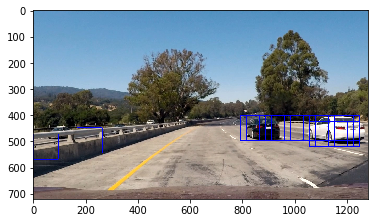

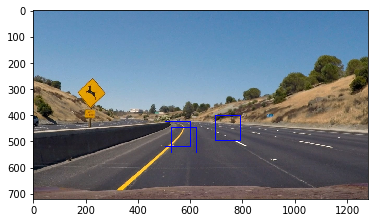

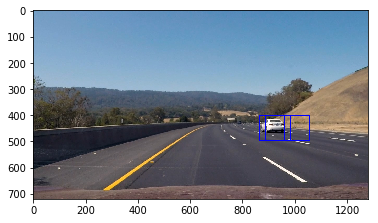

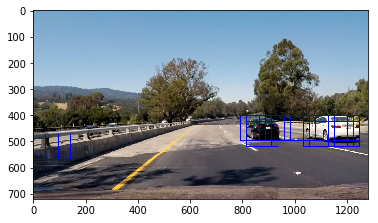

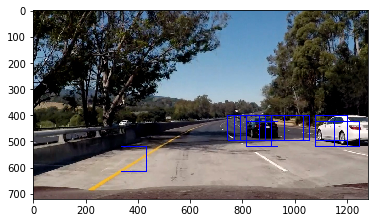

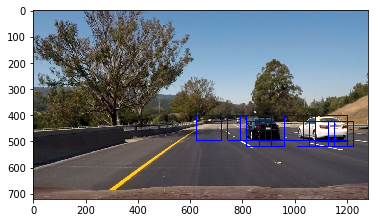

In [11]:
for image in images:
    image = mpimg.imread(image)
    out_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    plt.imshow(out_img)
    plt.show()

In [12]:
heatmap = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through the list of bboxes
    for box in bbox_list:
        (x1, y1), (x2, y2) = box
        # Increment for all pixels inside each bbox
        heatmap[y1:y2, x1:x2] += 1

    return heatmap


def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0

    return heatmap


def draw_labeled_bboxes(img, labels):
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number) .nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box n the image
        left_top, right_bottom = bbox
        cv2.rectangle(img, left_top, right_bottom, (0, 0, 255), 2)
        
    return img

### Criteria: Show some examples of test images to demonstrate how your pipeline is working. How did you optimize the performance of your classifier?

Searching car in the different scales can be parallelized. The image where the car are detected is shared but it is not modified and only the points represesnt areas that can have car images are returned to the caller of the car detecting function. So I employed `multiprocessing` module of Python and made each car finging is executed in a newly spawned process.  Then I wrote a wrapper that put the retrieved points into the shared thread-safe list.

This worked well on the image provided by Udacity but the processes are crashed when I tried it on my laptop that runs Mac OSX.

In [13]:
from scipy.ndimage.measurements import label
from multiprocessing import Lock, Pool, Process, Manager

heatmap = np.zeros_like(image[:,:,0]).astype(np.float)

heat = add_heat(heatmap, box_list)
heat = apply_threshold(heat, 1)
head = np.clip(heat, 0, 255)

labels = label(heat)

draw_img = draw_labeled_bboxes(np.copy(image), labels)

def find_cars_p(image, ystart, ystop, scale, svc, X_scaler,
               orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, shared_list):
    # print("Searching cars at scale %.2f" % scale)
    _, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler,
                            orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    # print(box_list)
    if len(box_list):
        shared_list.append(box_list)
    # print("Done at scale %.2f" % scale)

def find_cars_in_parallel(image, ystart, ystop, scales, svc, X_scaler, orient,
                          pix_per_cell, cell_per_block, spatial_size, hist_bins):
    manager = Manager()
    box_lists = manager.list()
    box_lists = []

    ps = []
    for scale in scales:
        l = []
        image = np.copy(image)
        p = Process(target=find_cars_p, args=(image, ystart, ystop, scale, svc, X_scaler,
                                             orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, l,))
        # print(dir(p))
        p.start()
        ps.append((p, l))
        
    for p, l in ps:
        # print("exit code: ", p.exitcode)
        p.join()
        box_lists.append(l)

    cv2.setNumThreads(0)
        
    return box_lists

def find_cars_sequential(image, ystart, ystop, scales, svc, X_scaler, orient,
                          pix_per_cell, cell_per_block, spatial_size, hist_bins):
    box_lists = []
    for scale in scales:
        # print("Searching cars at scale %.2f" % scale)
        draw_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler,
                   orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        # print("Done at scale %.2f" % scale)
        # box_lists.append(*box_list)
        box_lists.append(box_list)
        
    return box_lists
        
def draw_heatmap(image, heatmap, box_lists, heat_threshold=3):
    heat = None
    for box_list in box_lists:
        heat = add_heat(heatmap, box_list)

    heat = apply_threshold(heat, heat_threshold)
    head = np.clip(heat, 0, 255)

    labels = label(heat)
    
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img

# scales = [0.75, 1., 1.25, 1.5, 1.75, 2.]
scales = [1.5]
box_lists = find_cars_sequential(image, ystart, ystop, scales, svc, X_scaler, orient,
                                  pix_per_cell, cell_per_block, spatial_size, hist_bins)
# box_lists = find_cars_in_parallel(image, ystart, ystop, scales, svc, X_scaler, orient,
#                                   pix_per_cell, cell_per_block, spatial_size, hist_bins)

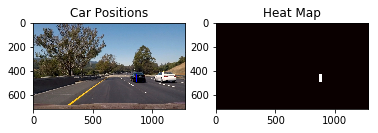

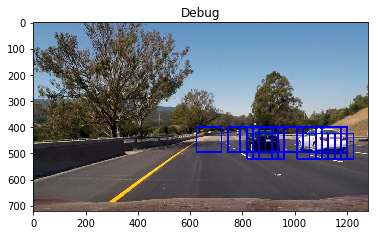

In [14]:
heatmap = np.zeros_like(image[:,:,0]).astype(np.float)

debug_img = np.copy(image)

from itertools import chain
flattened_box_lists = [item for sublist in box_lists for item in sublist]
debug_img = draw_boxes(image, flattened_box_lists, color=(0, 0, 255), thick=6)

draw_img = draw_heatmap(image, heatmap, box_lists, heat_threshold=6)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig = plt.figure()
plt.show()

plt.imshow(debug_img)
plt.title('Debug')
plt.show()

In [15]:
def detect_car(image, scales=[0.75,1,1.5,2.5,2,3], heat_threshold=10):
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)

    box_lists = find_cars_sequential(image, ystart, ystop, scales, svc, X_scaler, orient,
    # box_lists = find_cars_in_parallel(image, ystart, ystop, scales, svc, X_scaler, orient,
                                     pix_per_cell, cell_per_block, spatial_size, hist_bins)
    draw_img = draw_heatmap(image, heatmap, box_lists, heat_threshold=heat_threshold)

    return draw_img

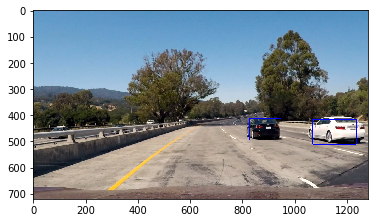

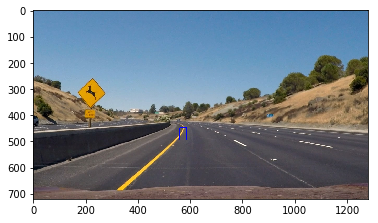

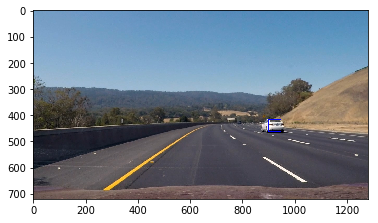

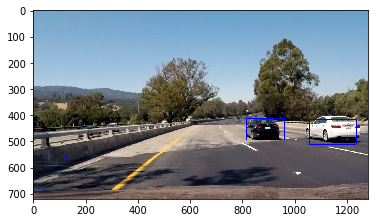

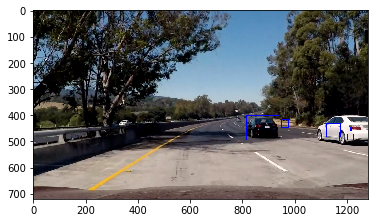

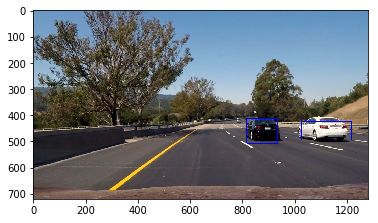

In [16]:
for image in images:
    image = mpimg.imread(image)
    car_detected_image = detect_car(image)
    
    plt.figure()
    plt.imshow(car_detected_image)
    plt.show()

In [18]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

video_output = 'output_images/detected_car.mp4'
clip1 = VideoFileClip("detected_lane.mp4").subclip(41, 46)
video_clip = clip1.fl_image(detect_car) #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

[MoviePy] >>>> Building video output_images/detected_car.mp4
[MoviePy] Writing video output_images/detected_car.mp4



 99%|█████████▉| 125/126 [10:53<00:05,  5.30s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/detected_car.mp4 

CPU times: user 10min, sys: 15 s, total: 10min 15s
Wall time: 10min 55s
